In [1]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [5]:
dataframe=read_csv('C:/Users/yjs61/Desktop/git/deeplearning/corona_daily.csv',usecols=[3],engine='python',skipfooter=3)
dataframe

,Confirmed
0,24
1,24
2,27
3,27
4,28
...,...
107,11190
108,11206
109,11225
110,11265


In [19]:
dataset=dataframe.values
dataset=dataset.astype('float32')
dataset

array([[   24.],
       [   24.],
       [   27.],
       [   27.],
       [   28.],
       [   28.],
       [   28.],
       [   28.],
       [   28.],
       [   29.],
       [   30.],
       [   31.],
       [   51.],
       [  104.],
       [  204.],
       [  433.],
       [  602.],
       [  833.],
       [  977.],
       [ 1261.],
       [ 1766.],
       [ 2337.],
       [ 3150.],
       [ 3736.],
       [ 4212.],
       [ 4812.],
       [ 5328.],
       [ 5766.],
       [ 6284.],
       [ 6767.],
       [ 7134.],
       [ 7382.],
       [ 7513.],
       [ 7755.],
       [ 7869.],
       [ 7979.],
       [ 8086.],
       [ 8162.],
       [ 8236.],
       [ 8320.],
       [ 8413.],
       [ 8565.],
       [ 8652.],
       [ 8799.],
       [ 8897.],
       [ 8961.],
       [ 9037.],
       [ 9137.],
       [ 9241.],
       [ 9332.],
       [ 9478.],
       [ 9583.],
       [ 9661.],
       [ 9786.],
       [ 9887.],
       [ 9976.],
       [10062.],
       [10156.],
       [10237.

In [7]:
scaler=MinMaxScaler(feature_range =(0,1))
dataset=scaler.fit_transform(dataset)
train_data,test_data = train_test_split(dataset,test_size =0.2,shuffle=False)
print(len(train_data),len(test_data))

89 23


In [9]:
def create_dataset(dataset,look_back):
    x_data=[]
    y_data=[]
    for i in range(len(dataset)-look_back-1):
        data=dataset[i:(i+look_back),0]
        x_data.append(data)
        y_data.append(dataset[i+look_back, 0])
    return np.array(x_data),np.array(y_data)

In [10]:
look_back=3
x_train ,y_train = create_dataset(train_data ,look_back)
x_test,y_test = create_dataset(test_data,look_back)

In [11]:
print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [12]:
X_train =np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
X_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [13]:
model =Sequential()
model.add(SimpleRNN(3,input_shape=(1,look_back)))
model.add(Dense(1,activation="linear"))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=1)

Epoch 1/100
85/85 [==============================] - 1s 3ms/step - loss: 0.0296
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3/100
85/85 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 4/100
85/85 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 6.9860e-04
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 5.5562e-04
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 5.4236e-04
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 5.5155e-04
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 5.2257e-04
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 5.5270e-04
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 5.2194e-04
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 5.2974e-04
Epoch

85/85 [==============================] - 0s 2ms/step - loss: 2.6949e-04
Epoch 98/100
85/85 [==============================] - 0s 2ms/step - loss: 2.4720e-04
Epoch 99/100
85/85 [==============================] - 0s 2ms/step - loss: 2.9546e-04
Epoch 100/100
85/85 [==============================] - 0s 2ms/step - loss: 2.8750e-04


In [15]:
trainPredict=model.predict(X_train)
testPredict =model.predict(X_test)
TrainPredict =scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

In [16]:
trainScore= math.sqrt(mean_squared_error(Y_train[0],TrainPredict[:,0]))
print('Train Score : %.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(Y_test[0],TestPredict[:,0]))
print('Test Score : %.2f RMSE'%(testScore))

Train Score : 174.37 RMSE
Test Score : 265.39 RMSE


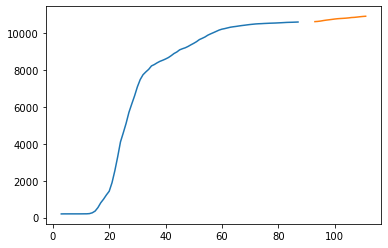

In [18]:
trainPredictPlot= np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back,:]=TrainPredict
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:] =np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset) , :]=TestPredict
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()